<a href="https://colab.research.google.com/github/ksyaban/breast-classification/blob/main/breast_cancer_classification_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklvq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklvq import GLVQ
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# load dataset
data = pd.read_csv('breast-cancer.csv')

# set data and target
X = data.drop(['diagnosis'], axis=1).values
y = data['diagnosis'].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Support Vector Machine
# inisiasi model SVM
svm_model = svm.SVC(kernel='rbf') # linear, poly, rbf

#Train the model using the training sets
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Learning Vector Quantization
# inisiasi model LVQ
lvq_model = GLVQ(
    distance_type="squared-euclidean",
    activation_type="swish",
    activation_params={"beta": 2},
    solver_type="steepest-gradient-descent",
    solver_params={"max_runs": 20, "step_size": 0.1},
    )

#Train the model using the training sets
lvq_model.fit(X_train, y_train)

GLVQ(activation_params={'beta': 2}, activation_type='swish',
     solver_params={'max_runs': 20, 'step_size': 0.1})

In [ ]:
# Random Forest
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model Random Forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi model

svm_predictions = svm_model.predict(X_test) # SVM Model
lvq_predictions = lvq_model.predict(X_test) # LVQ Model
rf_predictions = rf_model.predict(X_test) # RF Model

In [ ]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier

# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('svm', svm_model), ('lvq', lvq_model), ('rf', rf_model)], voting='hard')



In [ ]:
# training all the model on the train dataset
final_model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluasi SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Akurasi SVM: {svm_accuracy:.2f}')

# Evaluasi LVQ
lvq_accuracy = accuracy_score(y_test, lvq_predictions)
print(f'Akurasi LVQ: {lvq_accuracy:.2f}')

# Evaluasi RF
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Akurasi Random Forrest: {rf_accuracy:.2f}')

# Evaluasi performa model gabungan
model_accuracy = accuracy_score(y_test, pred_final)
print(f'Akurasi Gabungan: {model_accuracy:.2f}')

Akurasi SVM: 0.98
Akurasi LVQ: 0.99
Akurasi Random Forrest: 0.98
Akurasi Gabungan: 0.98


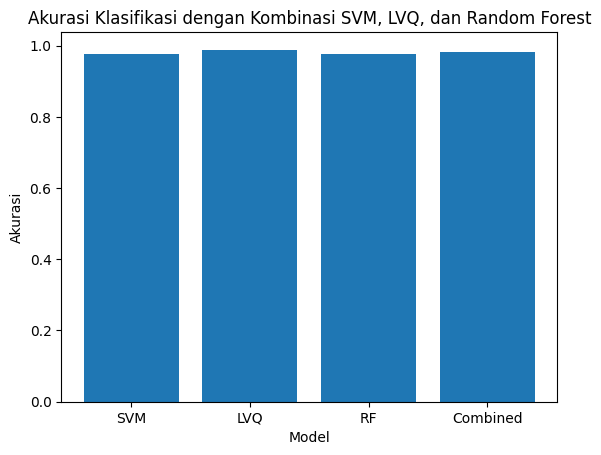

In [ ]:
import matplotlib.pyplot as plt

# Grafik akurasi
models = ['SVM', 'LVQ', 'RF', 'Combined']
accuracies = [svm_accuracy, lvq_accuracy, rf_accuracy, model_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Akurasi Klasifikasi dengan Kombinasi SVM, LVQ, dan Random Forest')
plt.show()

